In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

In [56]:
df  = pd.read_csv("PJME_hourly.csv")
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [57]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,PJME_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,12,2002,2002-12-31,01:00:00,1,Tuesday
2002-12-31 02:00:00,25147.0,12,2002,2002-12-31,02:00:00,1,Tuesday
2002-12-31 03:00:00,24574.0,12,2002,2002-12-31,03:00:00,1,Tuesday
2002-12-31 04:00:00,24393.0,12,2002,2002-12-31,04:00:00,1,Tuesday
2002-12-31 05:00:00,24860.0,12,2002,2002-12-31,05:00:00,1,Tuesday
2002-12-31 06:00:00,26222.0,12,2002,2002-12-31,06:00:00,1,Tuesday
2002-12-31 07:00:00,28702.0,12,2002,2002-12-31,07:00:00,1,Tuesday
2002-12-31 08:00:00,30698.0,12,2002,2002-12-31,08:00:00,1,Tuesday
2002-12-31 09:00:00,31800.0,12,2002,2002-12-31,09:00:00,1,Tuesday


In [58]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018] 

Total Number of Unique Year 17 



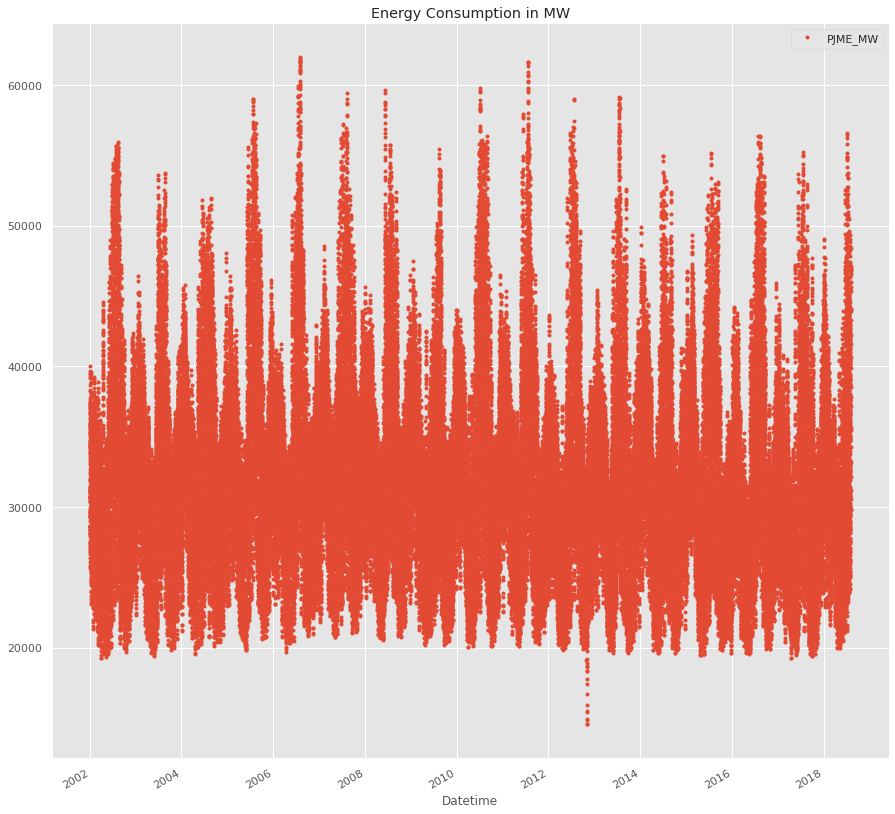

In [59]:
color_plot = sn.color_palette()
power.plot(style = '.', figsize = (15, 15), color = color_plot[0], title = 'Energy Consumption in MW')

Text(0.5, 1.0, 'Energy Consumption According to Year')

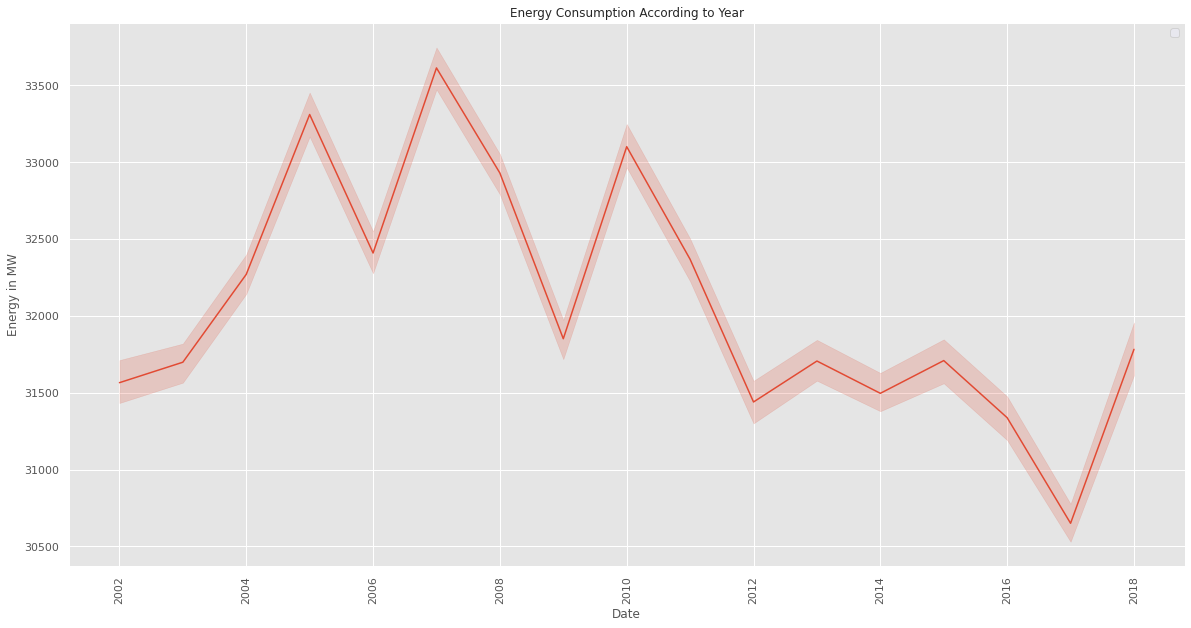

In [60]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sn.lineplot(x=df["Year"], y=df["PJME_MW"], data=df)
sn.set(rc={'figure.figsize':(20,10)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

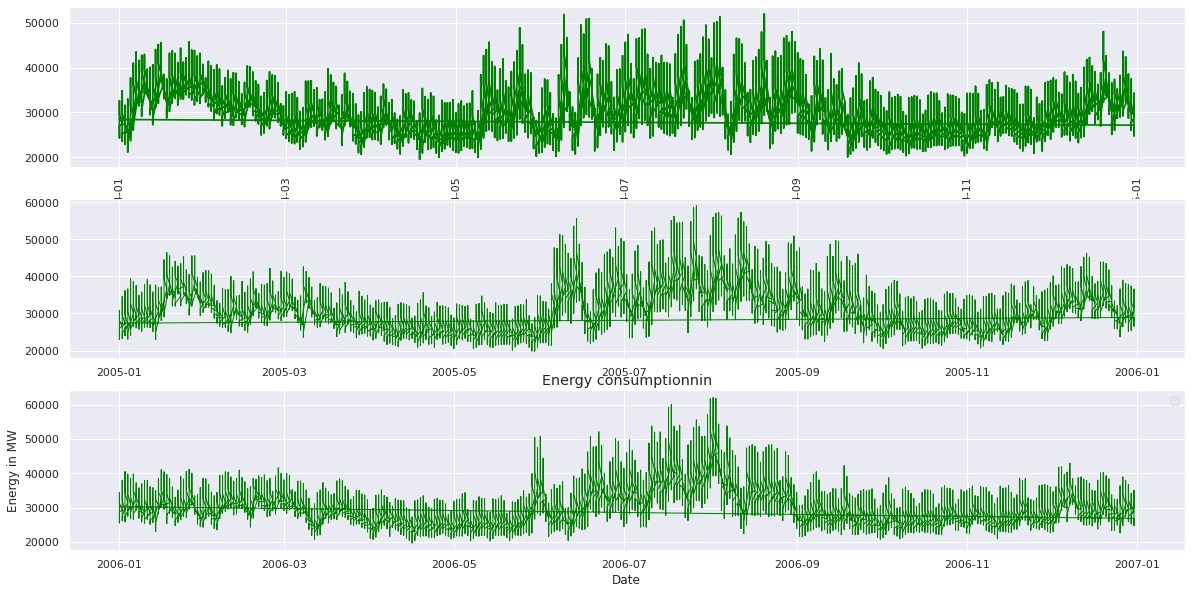

In [61]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset.loc["2004"]["PJME_MW"].to_list()
x_2004 = dataset.loc["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset.loc["2005"]["PJME_MW"].to_list()
x_2005 = dataset.loc["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset.loc["2006"]["PJME_MW"].to_list()
x_2006 = dataset.loc["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (20,10)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Energy Distribution')

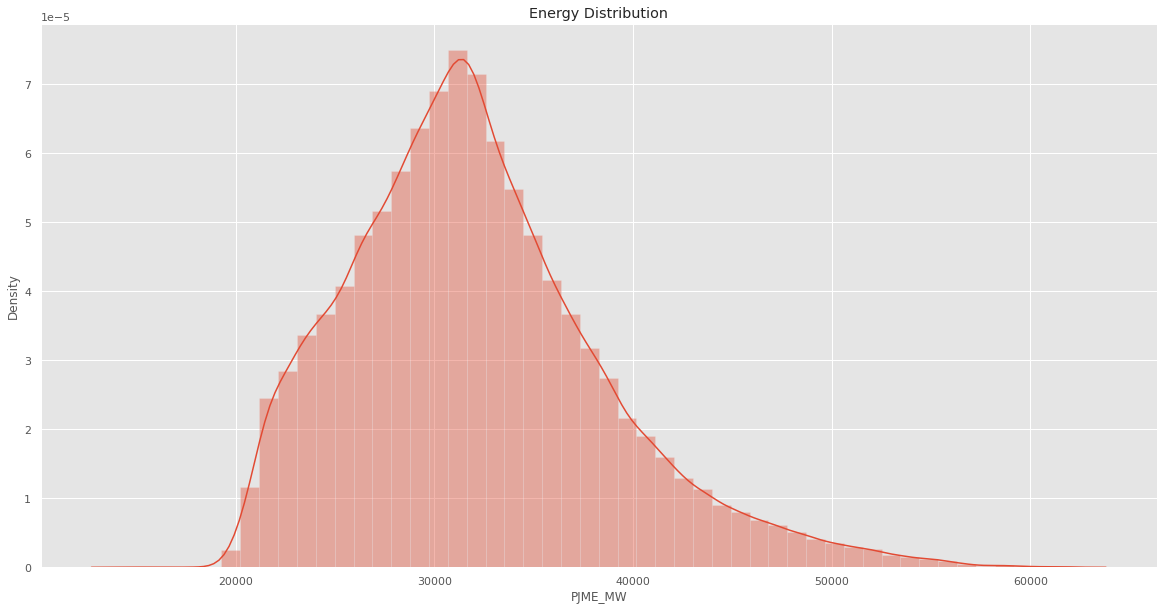

In [62]:
sn.distplot(dataset["PJME_MW"])
plt.title("Energy Distribution")

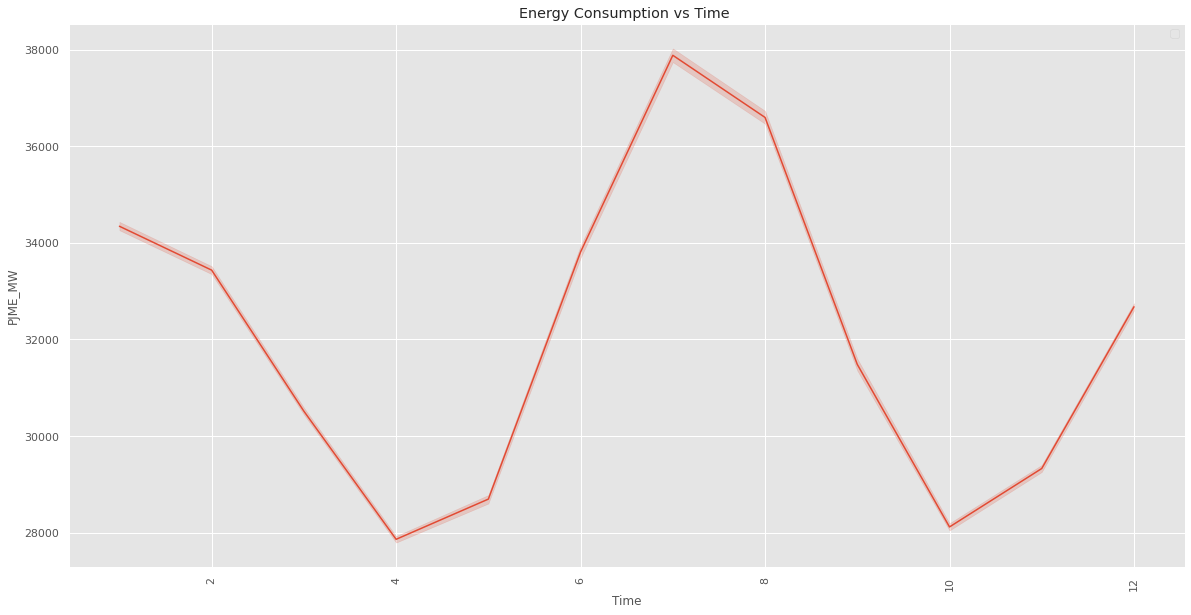

In [63]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sn.lineplot(x = df["Month"], y = df["PJME_MW"], data = df)
# sns.relplot(data=df, x="Time", y="AEP_MW", kind="line")
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [98]:
def datasets(df, window_size = 23):
  X = []
  Y = []

  for i in range(len(df) - window_size):
    row = [[a] for a in df[i:i+23]]
    X.append(row)
    label = df[i+23]
    Y.append(label)

  return np.array(X), np.array(Y)

In [99]:
from sklearn.preprocessing import MinMaxScaler
Window_size = 23

power_df = dataset.iloc[:,0:1]

sc = MinMaxScaler(feature_range=(0, 1))

power_df = sc.fit_transform(power_df)

print(len(power_df), power_df.shape)
X, y = datasets(power_df, Window_size) 

145366 (145366, 1)


In [100]:
print(X.shape,'\n',y.shape)

(145343, 23, 1, 1) 
 (145343, 1)


In [157]:
X_train, y_train = X[:110000], y[:110000]
X_val, y_val = X[110000:110500], y[110000:110500]
X_test, y_test = X[110500:], y[110500:]

X_Train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))
X_Val = np.reshape(X_val, newshape=(X_val.shape[0], X_val.shape[1], 1))
X_Test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))

X_Train.shape, X_Val.shape, X_Test.shape

((110000, 23, 1), (500, 23, 1), (34843, 23, 1))

In [128]:
X_Train[1].shape

(23, 1)

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [132]:
model = Sequential()

model.add(LSTM(units = 23, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 23, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 23, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 23))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 23, 23)            2300      
                                                                 
 dropout_20 (Dropout)        (None, 23, 23)            0         
                                                                 
 lstm_24 (LSTM)              (None, 23, 23)            4324      
                                                                 
 dropout_21 (Dropout)        (None, 23, 23)            0         
                                                                 
 lstm_25 (LSTM)              (None, 23, 23)            4324      
                                                                 
 dropout_22 (Dropout)        (None, 23, 23)            0         
                                                                 
 lstm_26 (LSTM)              (None, 23)              

In [135]:
checkpoint = ModelCheckpoint('Saved_Model/', save_best_only = True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [136]:
model.fit(X_Train, y_train, validation_data=(X_Val, y_val), epochs=10, callbacks=[checkpoint], batch_size=32)

Epoch 1/10
3437/3438 [============================>.] - ETA: 0s - loss: 0.0156 - root_mean_squared_error: 0.1248

3438/3438 [==============================] - 166s 46ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - val_loss: 0.0057 - val_root_mean_squared_error: 0.0758
Epoch 2/10
3438/3438 [==============================] - ETA: 0s - loss: 0.0068 - root_mean_squared_error: 0.0827

3438/3438 [==============================] - 155s 45ms/step - loss: 0.0068 - root_mean_squared_error: 0.0827 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0600
Epoch 3/10
3437/3438 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0730

3438/3438 [==============================] - 158s 46ms/step - loss: 0.0053 - root_mean_squared_error: 0.0730 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0527
Epoch 4/10
3438/3438 [==============================] - ETA: 0s - loss: 0.0046 - root_mean_squared_error: 0.0676

3438/3438 [==============================] - 157s 46ms/step - loss: 0.0046 - root_mean_squared_error: 0.0676 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0477
Epoch 5/10
3437/3438 [============================>.] - ETA: 0s - loss: 0.0039 - root_mean_squared_error: 0.0626

3438/3438 [==============================] - 157s 46ms/step - loss: 0.0039 - root_mean_squared_error: 0.0626 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0466
Epoch 6/10
3437/3438 [============================>.] - ETA: 0s - loss: 0.0034 - root_mean_squared_error: 0.0579

3438/3438 [==============================] - 156s 45ms/step - loss: 0.0034 - root_mean_squared_error: 0.0579 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0390
Epoch 7/10
3437/3438 [============================>.] - ETA: 0s - loss: 0.0028 - root_mean_squared_error: 0.0529

3438/3438 [==============================] - 154s 45ms/step - loss: 0.0028 - root_mean_squared_error: 0.0529 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 8/10
3437/3438 [============================>.] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0479

3438/3438 [==============================] - 154s 45ms/step - loss: 0.0023 - root_mean_squared_error: 0.0480 - val_loss: 9.2869e-04 - val_root_mean_squared_error: 0.0305
Epoch 9/10
3438/3438 [==============================] - ETA: 0s - loss: 0.0019 - root_mean_squared_error: 0.0435

3438/3438 [==============================] - 154s 45ms/step - loss: 0.0019 - root_mean_squared_error: 0.0435 - val_loss: 6.8418e-04 - val_root_mean_squared_error: 0.0262
Epoch 10/10
3438/3438 [==============================] - ETA: 0s - loss: 0.0016 - root_mean_squared_error: 0.0398

3438/3438 [==============================] - 155s 45ms/step - loss: 0.0016 - root_mean_squared_error: 0.0398 - val_loss: 6.2218e-04 - val_root_mean_squared_error: 0.0249


In [153]:
test_predictions = model.predict(X_Test)
test_predictions

array([[0.16862416],
       [0.18499863],
       [0.20548788],
       ...,
       [0.61587894],
       [0.5803702 ],
       [0.5367068 ]], dtype=float32)

In [181]:
# Inverse Transformation to get Values 
predicted_price = sc.inverse_transform(test_predictions)
predicted_price.flatten()

array([22547.746, 23324.96 , 24297.48 , ..., 43776.695, 42091.27 ,
       40018.79 ], dtype=float32)

In [185]:
True_MegaWatt = y_test
True_MegaWatt = sc.inverse_transform(True_MegaWatt)
Predicted_MegaWatt  = predicted_price
True_MegaWatt = True_MegaWatt.flatten()

Machine_Df = pd.DataFrame(data={
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt]
})



In [186]:
Machine_Df

,TrueMegaWatt,PredictedMeagWatt
0,21842.0,22547.746094
1,22283.0,23324.960938
2,24038.0,24297.480469
3,26870.0,25488.126953
4,29245.0,27139.720703
...,...,...
34838,44284.0,45377.140625
34839,43751.0,44951.394531
34840,42402.0,43776.695312
34841,40164.0,42091.269531


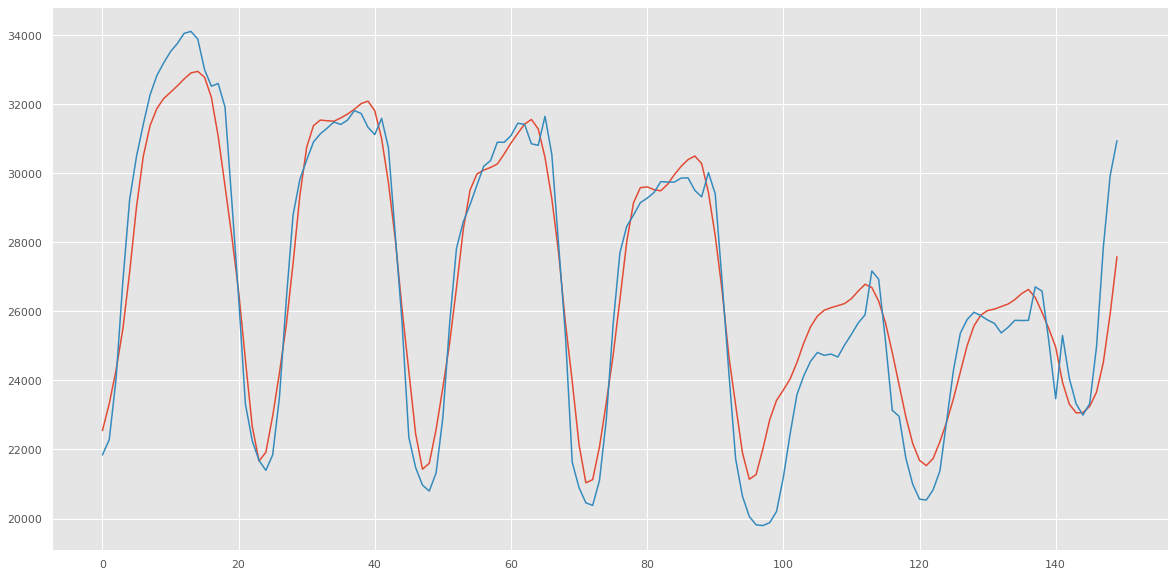

In [195]:
plt.plot(Machine_Df['PredictedMeagWatt'][:150])
plt.plot(Machine_Df['TrueMegaWatt'][:150])